# Введение в Pytorch


В этом курсе мы по большей части будем пользоваться pytorch.
Этот фреймворк во многом похож на numpy, главное его отлисие в том, что он может считать градиенты с помощью своего autograd модуля. Еще одно отличие - он поддерживает gpu.

План ноутбука:
1) основные операции
2) тензоры
3) градиенты
2) пайплайн обучения

# Основные операции

In [1]:
import numpy as np
import torch
from functorch.dim import softmax
from matplotlib import pyplot as plt
from urllib3.util.wait import select_wait_for_socket

In [2]:
a = np.random.rand(5, 3)
a

array([[0.30427273, 0.87008152, 0.76108906],
       [0.57261783, 0.64569077, 0.04757498],
       [0.58747206, 0.79324889, 0.42462752],
       [0.32176448, 0.91209527, 0.89877259],
       [0.57296658, 0.65711018, 0.87493564]])

In [3]:
a + 5

array([[5.30427273, 5.87008152, 5.76108906],
       [5.57261783, 5.64569077, 5.04757498],
       [5.58747206, 5.79324889, 5.42462752],
       [5.32176448, 5.91209527, 5.89877259],
       [5.57296658, 5.65711018, 5.87493564]])

In [4]:
a ** 2

array([[0.09258189, 0.75704184, 0.57925656],
       [0.32789118, 0.41691657, 0.00226338],
       [0.34512343, 0.62924381, 0.18030853],
       [0.10353238, 0.83191778, 0.80779217],
       [0.3282907 , 0.43179379, 0.76551237]])

In [5]:
a.shape

(5, 3)

In [6]:
a.flatten()

array([0.30427273, 0.87008152, 0.76108906, 0.57261783, 0.64569077,
       0.04757498, 0.58747206, 0.79324889, 0.42462752, 0.32176448,
       0.91209527, 0.89877259, 0.57296658, 0.65711018, 0.87493564])

In [7]:
a.reshape(-1, 1)

array([[0.30427273],
       [0.87008152],
       [0.76108906],
       [0.57261783],
       [0.64569077],
       [0.04757498],
       [0.58747206],
       [0.79324889],
       [0.42462752],
       [0.32176448],
       [0.91209527],
       [0.89877259],
       [0.57296658],
       [0.65711018],
       [0.87493564]])

In [8]:
b = np.random.rand(7, 5)

In [9]:
a.T @ b.T


array([[1.2731433 , 1.33098992, 1.61988587, 0.91186775, 0.7335391 ,
        1.43701965, 1.27026659],
       [2.38650988, 2.34315257, 2.75426038, 1.76912304, 1.45904951,
        2.46229344, 2.04595715],
       [1.67208115, 2.17069972, 1.83908784, 1.57986656, 1.33239698,
        2.3052063 , 1.56279636]])

Задача 1: напишите функцию, которая принимает на вход вектор размера n и возвращает значения функции $2log(x^2) - 1.5 sqrt(x) + x^{1/2}$

In [10]:
def f(x: np.ndarray):
    return 2 * np.log(x ** 2) - 1.5 * np.sqrt(x) + np.power(x, 1/2)    

Задача 2: Посчитайте сумму значений функции из 1 задачи для натуральных чисел с 1 до 300

In [26]:
np.sum(f(np.array(list(range(1, 301)))))

3923.345205492068

Cинтаксис в torch очень похож на numpy, однако с некоторыми отличиями

In [27]:
a = torch.rand(5,3)

In [28]:
a**2

tensor([[0.0453, 0.4068, 0.4131],
        [0.3558, 0.6622, 0.0491],
        [0.2711, 0.5577, 0.5570],
        [0.3668, 0.6359, 0.8618],
        [0.3387, 0.8503, 0.8551]])

In [29]:
a.size()

torch.Size([5, 3])

In [30]:
a.flatten()

tensor([0.2129, 0.6378, 0.6427, 0.5965, 0.8137, 0.2216, 0.5206, 0.7468, 0.7463,
        0.6056, 0.7974, 0.9284, 0.5820, 0.9221, 0.9247])

In [31]:
a = a.view(-1,1)

In [32]:
a = a.resize(5, 3)

C:\Users\tosha\AppData\Roaming\Python\Python311\site-packages\torch\_tensor.py:889: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [33]:
a

tensor([[0.2129, 0.6378, 0.6427],
        [0.5965, 0.8137, 0.2216],
        [0.5206, 0.7468, 0.7463],
        [0.6056, 0.7974, 0.9284],
        [0.5820, 0.9221, 0.9247]])

In [34]:
a.unsqueeze(0)

tensor([[[0.2129, 0.6378, 0.6427],
         [0.5965, 0.8137, 0.2216],
         [0.5206, 0.7468, 0.7463],
         [0.6056, 0.7974, 0.9284],
         [0.5820, 0.9221, 0.9247]]])

In [35]:
b = torch.rand(7,5)

In [36]:
a.T @ b.T

tensor([[0.8959, 0.7182, 1.5727, 1.0986, 0.9521, 0.8256, 1.5804],
        [1.3704, 1.1072, 2.4814, 1.8024, 1.3526, 1.5088, 2.4681],
        [0.8582, 0.9508, 2.2082, 1.3201, 1.4711, 1.5095, 2.4071]])

In [37]:
torch.matmul(b, a)

tensor([[0.8959, 1.3704, 0.8582],
        [0.7182, 1.1072, 0.9508],
        [1.5727, 2.4814, 2.2082],
        [1.0986, 1.8024, 1.3201],
        [0.9521, 1.3526, 1.4711],
        [0.8256, 1.5088, 1.5095],
        [1.5804, 2.4681, 2.4071]])

In [38]:
b = torch.rand(3,1,4,1,5)

In [39]:
b.squeeze().shape

torch.Size([3, 4, 5])

In [40]:
b.squeeze(1).shape

torch.Size([3, 4, 1, 5])

Задача 3. напишите функцию на torch, которая принимает на вход вектор размера n и возвращает значения функции $2log(x^2) - 1.5 sqrt(x) + x^{1/2}$

In [43]:
def f(x: torch.Tensor):
    return 2 * torch.log(x ** 2) - 1.5 * torch.sqrt(x) + torch.pow(x, 1/2)    

Задача 4: Посчитайте сумму значений функции из 3 задачи для натуральных чисел с 1 до 300

In [44]:
torch.sum(f(torch.tensor(list(range(1, 301)))))

tensor(3923.3452)

 Другие варианты создать тензор

In [45]:
a = torch.empty(5,2)
b = torch.zeros(6,1, dtype=torch.bool)
c = torch.ones_like(b)

Тензор можно создать и из другого объекта. Как думаете, какой тип будет у результирующего тензора?

In [46]:
d = torch.tensor([5,3.4])

In [47]:
d.dtype

torch.float32

Torch легко переводится в numpy и наоборот. Из-за разницы типов результат не будет идентичным, но он будет достаточно близким к исходному.

In [48]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

# Градиенты
Рассмотрим достаточно простой датасет

In [64]:
x1 = torch.arange(-15, 15, 0.1)
x2 = torch.arange(-15, 15, 0.1) / 5
x = torch.stack([x1, x2], dim=1)
y = x[:,0] * 2. + 0.2 * x[:, 1]**2 - 3 + torch.normal(0., 0.2, (1, 300))

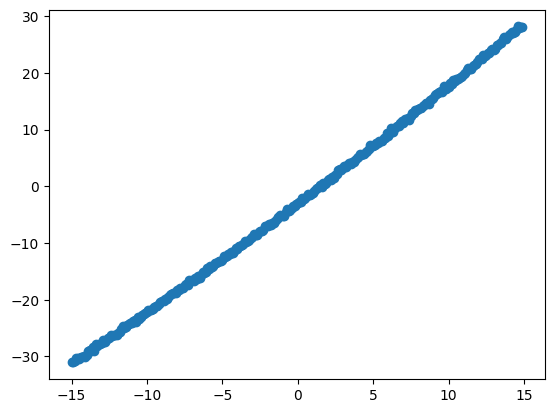

In [65]:
plt.scatter(x[:, 0], y)

Доп.задание. Изобразите поверхность на 3d-графике

In [67]:
import plotly.express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=y.squeeze())
fig.show()

В PyTorch при создании тензора можно указать, нужно ли считать по нему градиент или нет, с помощью параметра requires_grad.
Если requires_grad=False, то это просто массив с числами, посчитать dx/dy не выйдет.
Если же requires_grad=True, то фреймворк будит учитывать этот тензор при построении графа вычислений производной.
Например, станет возможно посчитать d(sin(log(x**2) - 3x))/dx.

Как происходит отслеживание градиента? Ответ достаточно простой: у каждого тензора на ссамом деле есть параметр .grad, который и хранит градиенты. У тех тензоров, к которым градиент неприменим, grad=None.

Что еще интереснее - у тех тензоров, через которые проходят вычисления, появляется параметр grad_fn. Например, у резултата a + b grad_fn будет AddBackward.

In [68]:
a = torch.rand(5,2, requires_grad=True)
b = torch.rand(2, 1, requires_grad=True)

In [71]:
res = (a @ b).sum()
res

tensor(1.5334, grad_fn=<SumBackward0>)

In [72]:
print(a.grad)

None


А как же получить значения градиентов? Тензоры что-то содержат, операции все известны.

In [73]:
res.backward()

In [74]:
b.grad.data

tensor([[2.0346],
        [1.9147]])

Перейдем к нашим данным. Попробуем обучить простую линейную модель с помощью градиентного спуска.

In [203]:
w = torch.rand(1, 2, requires_grad=True)
b = torch.rand(1, requires_grad=True)
y_pred = w @ x.T + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

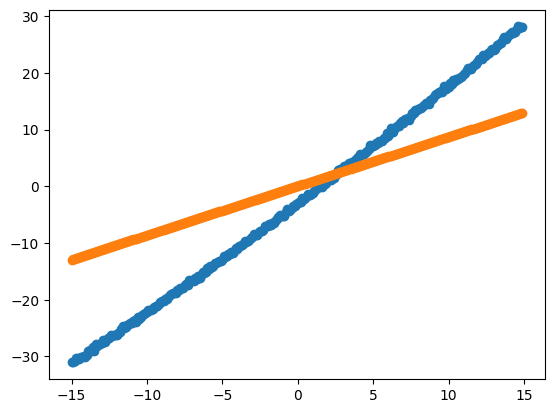

In [204]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_pred.detach().numpy())

Пока не слишком похоже на то, что мы хотим. Для того, чтобы изменения применились, нужно сделать шаг градиентного спуска.

**Задание**. Проведите 100 итераций градиентного спуска для данного набора.
Для этого надо вспомнить, как выглядит этот алгоритм для линейной регрессии

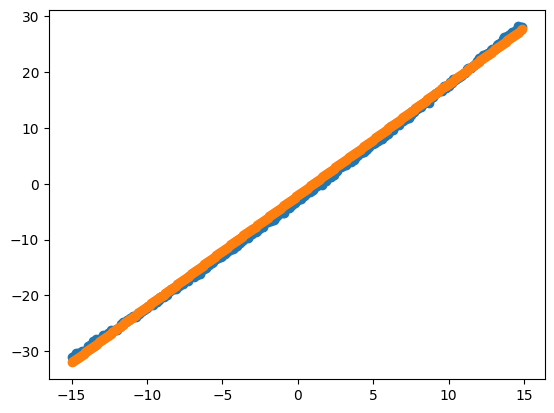

In [205]:
for i in range(100):
    y_pred = w @ x.T + b
    loss = torch.mean((y_pred - y) ** 2)
    loss.retain_grad()
    w.retain_grad()
    b.retain_grad()
    loss.backward()
    w = w - 0.01 * w.grad.data
    b = b - 0.01 * b.grad.data
    loss.grad.data.zero_()
    # your code: adjust w and b using gradient descent
    # Every iteration you need to set gradients to zero (or you will get unexpected results).
    # This is done by .grad.data.zero_()
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_pred.detach().numpy())

# Пайплайн обучения
Импортируем torch.nn - тут находятся классы, реализующие слои, лоссы, функции ошибок и тд. 
Для примера я использую стандартный датасет для компьютерного зрения - MNIST - содержащий цифры от 0 до 9 в разном написании. Поэтому импортируются некоторые подмодули torchvision


In [209]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [210]:
import os
import pandas as pd
from torchvision.io import read_image


# Создание датасета

Pytorch позволяет использовать открытые датасеты с хаба. Они все являются подклассами `torch.utils.data.Dataset` и имплементируют методы, специфичные для этого класса данных. Обычно они используются для прототипирования и бенчмаркинга и могут быть загружены по необходимости. Однако если для задачи необxодимо что-то кроме предполагаемой разработчиками функциональности, нужно либо отнаследовать один из них, либо напрямую `torch.utils.data.Dataset`.

Давайте загрузим FashionMNIST (https://github.com/zalandoresearch/fashion-mnist) - один из таких простых бенчмарк-датасетов для компьютерного зрения. Каждый семпл - это черно-белое изображение размером 28х28 с каким-то предметом одежды и ассоциированным классом. Всего набор содержит 60000 + 10000 изображений и 10 классов.


In [211]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:17<00:00, 1483080.52it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 719917.67it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1498682.33it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [212]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [213]:
def plot_samples(data, labels_map, cols=3, rows=3):
    figure = plt.figure(figsize=(8, 8))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        if type(label) == torch.Tensor:
            plt.title(labels_map[label.item()])
        else:
            plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

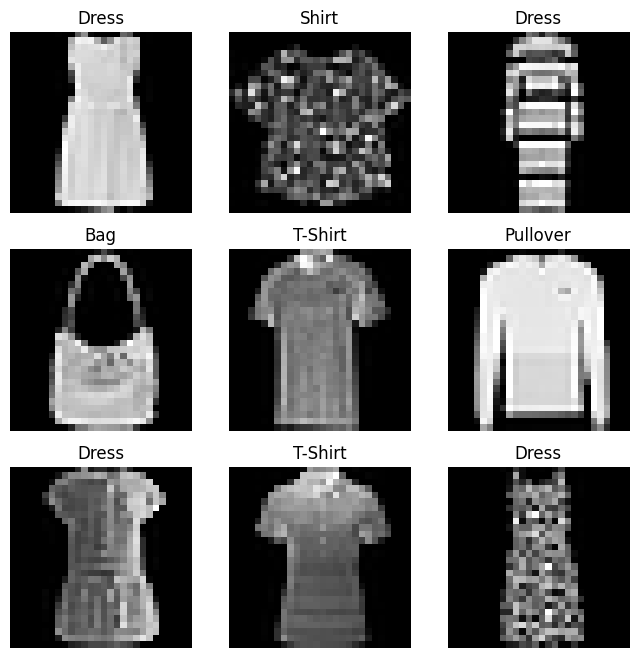

In [214]:
plot_samples(train_data, labels_map, cols=3, rows=3)

Каждый датасет в Pytorch должен наследоваться от класса Dataset и обязательно имплементировать методы `__init__, __len__, __getitem__`. В `__init__` обычно кроме прочего определяются трансформации, которые будут применяться к данным. Это может быть преобразование PIL.Image в тензоры, добавление шума, сдвиги и т.д. 
Pytorch предоставляет большое количество трансформаций, но наиболее популярная и удобная библиотека, реализующая трансформации для изображений - *albumentations*. 

`__len__` - должна возвращать размер датасета (например, чисо строк в файле с аннотациями)

`__getitem__` - должен возвращать семпл данных, например, вектор признаков и y. Однако он может возвращать еще и дополнительную информацию, например, y может состоять из набора bboxoв и  сегментационных масок для детекции, класса изображения итп. Обычно возвращается tuple. В целом, возвращаться может любая структура, которую можно представить как набор тензоров, соответствующих одному семплу и входу модели.
Внутри этого метода может происходить загрузка семпла, его трансформации и другие необходимые манипуляции. Очевидно, что он может возвращать не только изображение, но и любые другие данные, и временные ряды, и табличные данные, и облака точек, и другое. 


Давайте реализуем такой датасет для FashionMNIST. Конечно, можно было бы спокойно использовать встроенный, но так не интересно )

In [215]:
from torchvision.datasets.mnist import read_image_file, read_label_file

In [216]:
class FashionMNISTDataset(Dataset):
    def __init__(self, file_dir, train=True, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        image_file = f"{'train' if self.train else 't10k'}-images-idx3-ubyte"
        self.data = read_image_file(os.path.join(file_dir, image_file))

        label_file = f"{'train' if self.train else 't10k'}-labels-idx1-ubyte"
        self.targets = read_label_file(os.path.join(file_dir, label_file))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.targets[idx]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Проинициализируйте ваш новый датасет так же, как и ранее встроенный.

In [414]:
train_data =  FashionMNISTDataset(file_dir="data/FashionMNIST/raw", train=True)
test_data = FashionMNISTDataset(file_dir="data/FashionMNIST/raw", train=False)

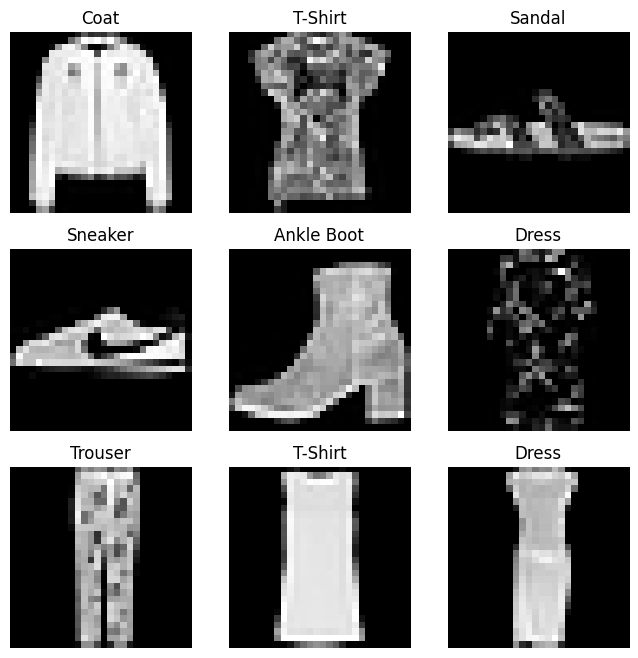

In [223]:
plot_samples(train_data, labels_map, cols=3, rows=3)

Датасет возвращает один семпл за раз, однако часто наши мощности позволяют обрабатывать больше данных. При работе с таблицами обыно модель получает на вход вообще весь набор сразу или достаточно большими порциями. Когда речь заходит о тензорах и наборах с сотнями тысяч и даже миллионами семплов, это невозможно. На помощь приходит батчевая обработка, когда из датасета берутся небольшие порции данных за раз (используя индекс). За соединение семплов во вход модели отвечает класс DataLoader. Каждую эпоху данные шаффлятся, чтобы уменьшить переобучение. 

In [324]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 28, 28])
Labels batch shape: torch.Size([64])


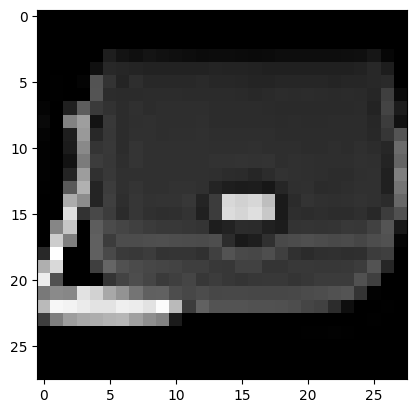

Label: 8


In [325]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().reshape(28,28)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Глубокое обучение чаще всего связывают с GPU, и не зря. Имея дело с тензорами и тензорными вычислениями, мы производим огромное количество элементарных операций. Каждое ядро CPU способно произвести только одно вычисление за такт. GPU был создан для обработки графики, где требуется также большое количество простых вычислений, и поэтому может ускорить обработку данных в тысячи раз. Это все должно быть хорошо Вам известно из других курсов)

К сожалению, часто компьютер не поддерживает вычисления на GPU, например, у него просто нет дискретной видеокарты. Pytorch позволяет проводить все операции на CPU, так что его можно использовать где угодно.



In [326]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


*Дополнительное задание: адаптируйте весь код для `accelerate`. Это очень удобная библиотека для адаптации PyTorch кода для любой распределенной конфигурации. Кроме того, она позволяет упростить работу, даже если нам нужно перенести вычисления на GPU или CPU, автоматизируя этот процесс (иначе нам нужно постоянно вызывать `.to(device)`)*
*Для этого импортируйте нужный Accelerator из accelerate. Далее достаточно вызвать accelerator.prepare(elements)*

Теперь создадим класс модели и интстанциируем её. В данном случае это простой перцептрон с тремя слоями. Однако модель может быть сколько угодно сложной. Главное, чтобы она наследовала класс `nn.Module`. Более того, можно написать любой слой собственноручно, также отнаследовав этот класс.
Каждая модель должна имплементировать два метода - `__init__` и `forward(self, *args, **kwargs)`. В первом обычно задается ее структура и другие параметры. Модель  может даже содержать другие модели!

`forward` получает на вход Х, но он может получать несколько разных входов, маски и тд. Обычно возвращаются либо выходы с последнего слоя (один или несколько). Но, например, стандартные модели детекции возвращают в режиме обучения значение лосса, а непосредственные предсказания только в режиме тестирования.

Вызывая `model(data)`, на самом деле мы вызываем именно метод `forward`

Для того, чтобы понять, как устроен слой в Pytorch, создадим простой слой для превращения изображения в вектор.
Пусть это будет класс MyFlatten. Изображения (и, что более актуально, промежуточные представления или, иными словами, карты, внутри модели) изначально имеют размер N x C x H x W, где:

N - число семплов в батче
C - число каналов на входе в конкретный слой. Если вход с 3 каналами, это 3, но в середине модели это может быть любое число, например, 128.
H - высота карты
W - ширина карты

Когда мы делаем что-то вроде двумерной свертки, это стандартное представление данных, которое позволяет восстановить пространственные зависимости между элементами карты. Однако, когда мы используем полносвязные модели, каждый семпл представлен единым вектором. В простом случае больше не нужно разделять разные каналы, строки и столбцы данных. Таким образом, мы используем операцию "вытянуть в вектор", чтобы превратить значения C x H x W в представление C * H * W. 

**Задание**: допишите класс MyFlatten. Этот слой при вызове должен принимать на вход тензор размера B x C x H x W и возвращать тензор размера B x [C * H * W]. Пример: батч картинок 2 x 3(rgb) x 16(h) x 16(w)] -> 2 x 768

In [327]:
class MyFlatten(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def __call__(self, tensor: torch.Tensor, *args, **kwargs):
        return tensor.view(tensor.size(0), -1)

In [397]:
class NeuralNetwork(nn.Module):
    def __init__(self, softmax=False):
        super().__init__()
        self.softmax = softmax
        self.flatten = MyFlatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        if self.softmax:
            return torch.log_softmax(logits, dim=1)
        else:
            return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): MyFlatten()
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Слои: http://pytorch.org/docs/nn.html

Активации: http://pytorch.org/docs/nn.html#non-linear-activations

Зададим функцию ошибки и оптимизатор. Функция ошибки также наследуется от torch.nn.Module и может быть стандартной, состоять как из нескольких стандартных функций или их модификаций. Большое количество функций ошибки уже реализовано в Pytorch.

Внутри каждой итерации обучения оптимизация происходит в три этапа:
Вызов optimizer.zero_grad() для обнуления градиентов параметров модели. Градиенты по умолчанию складываются; чтобы избежать двойного подсчета, мы явно обнуляем их на каждой итерации.

Получение градиентов для каждого веса с помощью loss.backward().
Как только мы получили наши градиенты, остается вызвать optimizer.step(), чтобы изменить параметры в соответствии с нашим алгоритмом оптимизации. 

In [346]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Задание: 
1) Выберите как минимум еще 2 разные функции ошибки из https://pytorch.org/docs/stable/nn.html#loss-functions и обучите модель с ними
2) Выберите как минимум еще 1 оптимизатор из https://pytorch.org/docs/stable/optim.html и обучите каждую из моделей с ним

В результате у вас должна получиться таблица с лучшими значениями лосса для каждого случая для обучения и теста. В идеале оформите их в виде pandas.DataFrame или другой таблицы с удобным выводом.

Обучим модель. Для этого нужно описать цикл обучения и проверки модели. В наивном случае создается две функции train и validate (test), которые вызываются в цикле по эпохам. В дальнейшем, при усложнении прохода по эпохе, может появиться метод train, целый класс Trainer и т.д. Пока что реализуем наивный вариант.

In [347]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    min_loss = float("inf")
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Compute prediction error
        preds = model(inputs.float())
        loss = loss_fn(preds, targets)
        if loss < min_loss:
            min_loss = loss
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            loss, current = loss.item(), (batch_idx + 1) * len(preds)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
        ''' Чтобы сделать задание со сравнением лоссов, не забудьте 
            реализовать трекинг минимального лосса  '''
    print(f'Min loss: {min_loss:>5f}')
    return min_loss

In [376]:
from sklearn.metrics import precision_score, recall_score

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, num_correct = 0, 0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            preds = model(inputs.float())
            num_correct += (preds.argmax(1) == targets).type(torch.float).sum().item()
            test_loss += loss_fn(preds, targets).item()
            
            # Store predictions and targets for metrics computation
            all_preds.extend(preds.argmax(1).cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    test_loss /= num_batches
    num_correct /= size
    
    # Compute precision and recall
    precision = precision_score(all_targets, all_preds, average='weighted', zero_division=np.nan)
    recall = recall_score(all_targets, all_preds, average='weighted', zero_division=np.nan)

    print(f"Test Error: \n Accuracy: {(100*num_correct):>0.1f}%, Avg loss: {test_loss:>8f}")
    print(f"Precision: {100*precision:>0.1f}%, Recall: {100*recall:>0.1f}% \n")
    return test_loss


Задание: Добавьте метрики precision и recall для проверки

In [349]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    # ваш код

Epoch 1
-------------------------------
loss: 16.231457  [   64/60000]
loss: 0.393282  [ 6464/60000]
loss: 0.577524  [12864/60000]
loss: 0.766597  [19264/60000]
loss: 0.539279  [25664/60000]
loss: 0.341917  [32064/60000]
loss: 0.492978  [38464/60000]
loss: 0.504251  [44864/60000]
loss: 0.596167  [51264/60000]
loss: 0.385734  [57664/60000]
Min loss: 0.216009
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.550746
Precision: 82.1%, Recall: 81.0% 

Epoch 2
-------------------------------
loss: 0.366182  [   64/60000]
loss: 0.365171  [ 6464/60000]
loss: 0.365133  [12864/60000]
loss: 0.322815  [19264/60000]
loss: 0.408649  [25664/60000]
loss: 0.459448  [32064/60000]
loss: 0.530426  [38464/60000]
loss: 0.529856  [44864/60000]
loss: 0.509409  [51264/60000]
loss: 0.381397  [57664/60000]
Min loss: 0.155116
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.434377
Precision: 84.9%, Recall: 84.8% 

Epoch 3
-------------------------------
loss: 0.433956  [   64/60000]
loss: 0.279384  [ 6464/60000]
loss: 0.50717

Осталось сохранить модель для дальнейшего использования. 

In [313]:
torch.save(model.state_dict(), "best_model.pth")

Какая точность получилась? 

87%

Сюда будем заносить результаты

In [ ]:
train_results = pd.DataFrame()
test_results = pd.DataFrame()

Далее будем тестировать разные комбинации функций потерь и оптимизатора

In [372]:
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
name = 'SGD+CrossEntropy'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 22.353920  [   64/60000]
loss: 0.642561  [ 6464/60000]
loss: 0.671151  [12864/60000]
loss: 0.599863  [19264/60000]
loss: 0.671378  [25664/60000]
loss: 0.427533  [32064/60000]
loss: 0.384700  [38464/60000]
loss: 0.365166  [44864/60000]
loss: 0.338094  [51264/60000]
loss: 0.417972  [57664/60000]
Min loss: 0.106815
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.454578
Precision: 83.7%, Recall: 83.9% 

Epoch 2
-------------------------------
loss: 0.232030  [   64/60000]
loss: 0.409542  [ 6464/60000]
loss: 0.356852  [12864/60000]
loss: 0.167906  [19264/60000]
loss: 0.417430  [25664/60000]
loss: 0.365328  [32064/60000]
loss: 0.271052  [38464/60000]
loss: 0.454648  [44864/60000]
loss: 0.453887  [51264/60000]
loss: 0.346880  [57664/60000]
Min loss: 0.096371
Test Error: 
 Accuracy: 83.2%, Avg loss: 0.470453
Precision: 84.5%, Recall: 83.2% 

Epoch 3
-------------------------------
loss: 0.215438  [   64/60000]
loss: 0.253395  [ 6464/60000]
loss: 0.28173

In [370]:
model = NeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
name = 'Adam+CrossEntropy'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 19.931549  [   64/60000]
loss: 0.802131  [ 6464/60000]
loss: 0.345466  [12864/60000]
loss: 0.445746  [19264/60000]
loss: 0.680452  [25664/60000]
loss: 0.366076  [32064/60000]
loss: 0.460308  [38464/60000]
loss: 0.460726  [44864/60000]
loss: 0.411817  [51264/60000]
loss: 0.490641  [57664/60000]
Min loss: 0.179668
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.453582
Precision: 84.0%, Recall: 83.6% 

Epoch 2
-------------------------------
loss: 0.315055  [   64/60000]
loss: 0.387930  [ 6464/60000]
loss: 0.657162  [12864/60000]
loss: 0.553608  [19264/60000]
loss: 0.175582  [25664/60000]
loss: 0.311358  [32064/60000]
loss: 0.349047  [38464/60000]
loss: 0.517951  [44864/60000]
loss: 0.573135  [51264/60000]
loss: 0.490472  [57664/60000]
Min loss: 0.154786
Test Error: 
 Accuracy: 83.8%, Avg loss: 0.445878
Precision: 84.1%, Recall: 83.8% 

Epoch 3
-------------------------------
loss: 0.413750  [   64/60000]
loss: 0.296248  [ 6464/60000]
loss: 0.35989

In [399]:
model = NeuralNetwork(softmax=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.NLLLoss()
name = 'SGD+NLLLoss'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 24.414474  [   64/60000]
loss: 0.727993  [ 6464/60000]
loss: 0.354190  [12864/60000]
loss: 0.490631  [19264/60000]
loss: 0.454440  [25664/60000]
loss: 0.443209  [32064/60000]
loss: 0.378827  [38464/60000]
loss: 0.496356  [44864/60000]
loss: 0.392855  [51264/60000]
loss: 0.681022  [57664/60000]
Min loss: 0.160444
Test Error: 
 Accuracy: 75.5%, Avg loss: 0.709204
Precision: 81.0%, Recall: 75.5% 

Epoch 2
-------------------------------
loss: 0.405615  [   64/60000]
loss: 0.399016  [ 6464/60000]
loss: 0.324591  [12864/60000]
loss: 0.390107  [19264/60000]
loss: 0.383485  [25664/60000]
loss: 0.508062  [32064/60000]
loss: 0.401409  [38464/60000]
loss: 0.489195  [44864/60000]
loss: 0.465828  [51264/60000]
loss: 0.275129  [57664/60000]
Min loss: 0.158420
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.423971
Precision: 84.8%, Recall: 84.9% 

Epoch 3
-------------------------------
loss: 0.282827  [   64/60000]
loss: 0.410402  [ 6464/60000]
loss: 0.24851

In [398]:
model = NeuralNetwork(softmax=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.NLLLoss()
name = 'Adam+NLLLoss'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 16.138924  [   64/60000]
loss: 0.637618  [ 6464/60000]
loss: 0.555513  [12864/60000]
loss: 0.641381  [19264/60000]
loss: 0.549155  [25664/60000]
loss: 0.492912  [32064/60000]
loss: 0.668580  [38464/60000]
loss: 0.557396  [44864/60000]
loss: 0.370909  [51264/60000]
loss: 0.477795  [57664/60000]
Min loss: 0.203695
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.465006
Precision: 84.1%, Recall: 83.9% 

Epoch 2
-------------------------------
loss: 0.317383  [   64/60000]
loss: 0.527822  [ 6464/60000]
loss: 0.641138  [12864/60000]
loss: 0.386757  [19264/60000]
loss: 0.568357  [25664/60000]
loss: 0.258806  [32064/60000]
loss: 0.527756  [38464/60000]
loss: 0.360393  [44864/60000]
loss: 0.275061  [51264/60000]
loss: 0.400593  [57664/60000]
Min loss: 0.118260
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.439247
Precision: 85.5%, Recall: 84.5% 

Epoch 3
-------------------------------
loss: 0.315685  [   64/60000]
loss: 0.291220  [ 6464/60000]
loss: 0.66106

In [400]:
model = NeuralNetwork(softmax=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.MultiMarginLoss()
name = 'SGD+MultiMarginLoss'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 5.824156  [   64/60000]
loss: 0.299283  [ 6464/60000]
loss: 0.202780  [12864/60000]
loss: 0.121765  [19264/60000]
loss: 0.062065  [25664/60000]
loss: 0.086717  [32064/60000]
loss: 0.075044  [38464/60000]
loss: 0.177412  [44864/60000]
loss: 0.153286  [51264/60000]
loss: 0.097244  [57664/60000]
Min loss: 0.029520
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.116176
Precision: 81.0%, Recall: 80.2% 

Epoch 2
-------------------------------
loss: 0.058295  [   64/60000]
loss: 0.108708  [ 6464/60000]
loss: 0.086846  [12864/60000]
loss: 0.081402  [19264/60000]
loss: 0.057830  [25664/60000]
loss: 0.061612  [32064/60000]
loss: 0.086830  [38464/60000]
loss: 0.032865  [44864/60000]
loss: 0.071191  [51264/60000]
loss: 0.054643  [57664/60000]
Min loss: 0.014754
Test Error: 
 Accuracy: 79.7%, Avg loss: 0.096682
Precision: 82.2%, Recall: 79.7% 

Epoch 3
-------------------------------
loss: 0.045825  [   64/60000]
loss: 0.032104  [ 6464/60000]
loss: 0.088765

In [401]:
model = NeuralNetwork(softmax=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MultiMarginLoss()
name = 'Adam+MultiMarginLoss'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 7.654085  [   64/60000]
loss: 0.057095  [ 6464/60000]
loss: 0.049178  [12864/60000]
loss: 0.114861  [19264/60000]
loss: 0.051962  [25664/60000]
loss: 0.150018  [32064/60000]
loss: 0.060818  [38464/60000]
loss: 0.064229  [44864/60000]
loss: 0.080739  [51264/60000]
loss: 0.093572  [57664/60000]
Min loss: 0.018169
Test Error: 
 Accuracy: 81.9%, Avg loss: 0.077900
Precision: 82.7%, Recall: 81.9% 

Epoch 2
-------------------------------
loss: 0.053174  [   64/60000]
loss: 0.063786  [ 6464/60000]
loss: 0.038583  [12864/60000]
loss: 0.051317  [19264/60000]
loss: 0.111685  [25664/60000]
loss: 0.040704  [32064/60000]
loss: 0.040022  [38464/60000]
loss: 0.038553  [44864/60000]
loss: 0.051578  [51264/60000]
loss: 0.096645  [57664/60000]
Min loss: 0.017964
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.064642
Precision: 84.2%, Recall: 84.0% 

Epoch 3
-------------------------------
loss: 0.083214  [   64/60000]
loss: 0.056223  [ 6464/60000]
loss: 0.044026

In [402]:
train_results

,SGD+CrossEntropy,Adam+CrossEntropy,SGD+NLLLoss,Adam+NLLLoss,SGD+MultiMarginLoss,Adam+MultiMarginLoss
0,0.106815,0.179668,0.160444,0.203695,0.029520,0.018169
1,0.096371,0.154786,0.158420,0.118260,0.014754,0.017964
2,0.124248,0.147303,0.116943,0.082710,0.005193,0.014501
3,0.086460,0.128343,0.100358,0.096916,0.010426,0.007781
4,0.084554,0.095181,0.086828,0.105443,0.011344,0.007631
5,0.084280,0.091412,0.083556,0.098007,0.008195,0.006739
6,0.077032,0.095353,0.078658,0.073349,0.009155,0.010661
7,0.087399,0.113446,0.063383,0.087859,0.002604,0.007862
8,0.040645,0.083738,0.055568,0.080719,0.005660,0.009032
9,0.063494,0.083616,0.050440,0.094700,0.005746,0.008148


In [403]:
test_results

,SGD+CrossEntropy,Adam+CrossEntropy,SGD+NLLLoss,Adam+NLLLoss,SGD+MultiMarginLoss,Adam+MultiMarginLoss
0,0.454578,0.453582,0.709204,0.465006,0.116176,0.077900
1,0.470453,0.445878,0.423971,0.439247,0.096682,0.064642
2,0.413790,0.414045,0.428932,0.415374,0.091300,0.060953
3,0.402523,0.403249,0.424342,0.417777,0.081154,0.064957
4,0.390009,0.452154,0.389677,0.415372,0.072308,0.059050
5,0.391556,0.403050,0.393274,0.479765,0.070518,0.055808
6,0.383219,0.419023,0.370098,0.395753,0.073661,0.054268
7,0.385529,0.394099,0.391851,0.423396,0.070075,0.055732
8,0.362244,0.444948,0.368222,0.395392,0.073744,0.070108
9,0.389556,0.381485,0.372409,0.383271,0.068679,0.058226


Text(0.5, 1.0, 'Test Results')

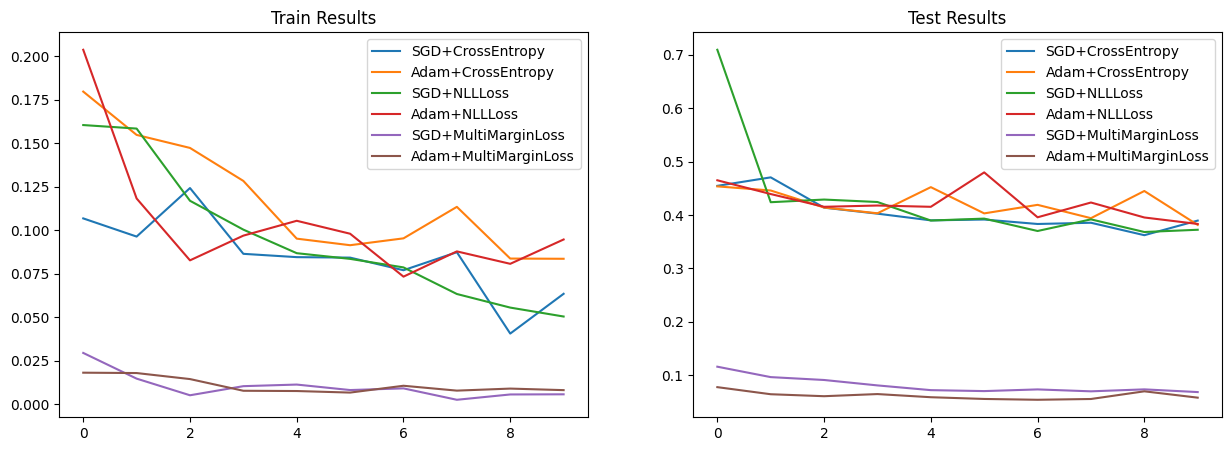

In [411]:
fix, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(train_results)
axes[0].legend(train_results)
axes[0].set_title('Train Results')
axes[1].plot(test_results)
axes[1].legend(test_results)
axes[1].set_title('Test Results')

Задание: Перепишите датасет FashionMNISTDataset так, чтобы он возвращал вектор вместо матрицы и мою модель без слоя MyFlatten(). Запустите обучение заново. Какая точность получилась теперь?

Задание: придумайте свою собственную модель, на следующем занятии сравнимся, у кого получилось достичь наилучших результатов. Для этого мне нужно будет получить как вашу версию этого ноутбука, так и веса модели.

In [415]:
class FashionMNISTDataset2(Dataset):
    def __init__(self, file_dir, train=True, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        image_file = f"{'train' if self.train else 't10k'}-images-idx3-ubyte"
        self.data = read_image_file(os.path.join(file_dir, image_file))

        label_file = f"{'train' if self.train else 't10k'}-labels-idx1-ubyte"
        self.targets = read_label_file(os.path.join(file_dir, label_file))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.targets[idx]
        
        image_vector = image.view(-1)
        
        if self.transform:
            image_vector = self.transform(image_vector)
        if self.target_transform:
            label = self.target_transform(label)
        return image_vector, label
    
train_data2 =  FashionMNISTDataset2(file_dir="data/FashionMNIST/raw", train=True)
test_data2 = FashionMNISTDataset2(file_dir="data/FashionMNIST/raw", train=False)    
train_dataloader2 = DataLoader(train_data2, batch_size=64, shuffle=True)
test_dataloader2 = DataLoader(test_data2, batch_size=64, shuffle=True)


class NeuralNetwork2(nn.Module):
    def __init__(self, softmax=False):
        super().__init__()
        self.softmax = softmax
        self.fc = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        logits = self.fc(x)
        if self.softmax:
            return torch.log_softmax(logits, dim=1)
        else:
            return logits

In [416]:
model = NeuralNetwork2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
name = 'SGD+CrossEntropy'
train_losses = []
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader2, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader2, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 24.829144  [   64/60000]
loss: 1.472943  [ 6464/60000]
loss: 0.465198  [12864/60000]
loss: 0.730008  [19264/60000]
loss: 0.490166  [25664/60000]
loss: 0.947462  [32064/60000]
loss: 0.206751  [38464/60000]
loss: 0.362438  [44864/60000]
loss: 0.666651  [51264/60000]
loss: 0.435917  [57664/60000]
Min loss: 0.180600
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.492681
Precision: 83.6%, Recall: 82.7% 

Epoch 2
-------------------------------
loss: 0.468820  [   64/60000]
loss: 0.282121  [ 6464/60000]
loss: 0.384753  [12864/60000]
loss: 0.300692  [19264/60000]
loss: 0.298911  [25664/60000]
loss: 0.340498  [32064/60000]
loss: 0.311420  [38464/60000]
loss: 0.292753  [44864/60000]
loss: 0.189467  [51264/60000]
loss: 0.415647  [57664/60000]
Min loss: 0.144951
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.443821
Precision: 84.8%, Recall: 84.3% 

Epoch 3
-------------------------------
loss: 0.254686  [   64/60000]
loss: 0.388494  [ 6464/60000]
loss: 0.44535

Точность не изменилась

In [486]:
class my_model(nn.Module):
    def __init__(self):
        super(my_model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x.unsqueeze_(1)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        return x

In [487]:
model = my_model().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [490]:
name = 'My_model'
train_losses = []
test_losses = []
for t in range(10):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer).detach().cpu().numpy()
    test_loss = test(test_dataloader, model, loss_fn)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
train_results[name] = np.array(train_losses)
test_results[name] = np.array(test_losses)

Epoch 1
-------------------------------
loss: 0.000235  [   64/60000]
loss: 0.001822  [ 6464/60000]
loss: 0.055030  [12864/60000]
loss: 0.092251  [19264/60000]
loss: 0.000754  [25664/60000]
loss: 0.008532  [32064/60000]
loss: 0.046509  [38464/60000]
loss: 0.002621  [44864/60000]
loss: 0.017583  [51264/60000]
loss: 0.012478  [57664/60000]
Min loss: 0.000000
Test Error: 
 Accuracy: 90.4%, Avg loss: 2.478925
Precision: 90.3%, Recall: 90.4% 

Epoch 2
-------------------------------
loss: 0.012367  [   64/60000]
loss: 0.000244  [ 6464/60000]
loss: 0.017106  [12864/60000]
loss: 0.030443  [19264/60000]
loss: 0.014139  [25664/60000]
loss: 0.101025  [32064/60000]
loss: 0.026074  [38464/60000]
loss: 0.082667  [44864/60000]
loss: 0.098305  [51264/60000]
loss: 0.143391  [57664/60000]
Min loss: 0.000000
Test Error: 
 Accuracy: 90.2%, Avg loss: 2.177212
Precision: 90.3%, Recall: 90.2% 

Epoch 3
-------------------------------
loss: 0.022434  [   64/60000]
loss: 0.013166  [ 6464/60000]
loss: 0.002202

При подборе гиперпараметров (это те параметры, которые не обучаются, например, lr) и обучении модели помните:
1. Если параметры выбраны хорошо, улучшение видно уже после нескольких сотен итераций.
2. Настраивайте гиперпараметры от грубых значений к точным: начните с тестирования большого диапазона гиперпараметров всего за несколько итераций обучения, чтобы найти комбинации параметров, которые вообще работают.
3. После того, как вы нашли несколько наборов параметров, которые, по-видимому, работают, выполните более тщательный поиск по этим параметрам. Возможно, вам придется тренировать модель большее число эпох.
4. Нужно использовать валидационный набор для поиска. Этот набор нужно выделить из тренировочного и вызывать на нем функцию test.

In [491]:
torch.save(model.state_dict(), "my_model.pth")